# General EDA of Vegetable Synthetic Dataset

In [93]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import plotly.express as px
import plotly.graph_objs as go

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.power import FTestPower


# Data Dictionary

| Column           | Data Type | Description                                                       |
|------------------|-----------|-------------------------------------------------------------------|
| `S. no.`         | `int64`   | Serial number, a unique identifier for each row                   |
| `Name`           | `object`  | Name of the vegetable                                             |
| `Soil_Type`      | `object`  | Type of soil in which the vegetable is grown                      |
| `Fertility`      | `object`  | Fertility status of the soil                                      |
| `Photoperiod`    | `object`  | Duration of light exposure the vegetable receives                 |
| `N-P-K Ratio`    | `object`  | Ratio of Nitrogen (N), Phosphorus (P), and Potassium (K) in the soil |
| `Temperature`    | `float64` | Average temperature (in degrees Celsius)                          |
| `Rainfall`       | `float64` | Amount of rainfall (in millimeters)                               |
| `pH`             | `float64` | pH level of the soil                                              |
| `Light_Hours`    | `float64` | Number of light hours per day                                     |
| `Light_Intensity`| `float64` | Intensity of light received (in lumens)                           |
| `Rh`             | `float64` | Relative humidity (percentage)                                    |
| `Yield`          | `float64` | Yield of the vegetable (100 g per hectare)                      |
| `Season`         | `object`  | Growing season of the vegetable (e.g., Winter, Spring, Summer, Fall) |


## General EDA

In [8]:
veg_data = pd.read_csv('/Users/kamiasalango/Desktop/Milan_Data_Urban_Ag/synthetic_veg_crop_data.csv')

In [10]:
veg_data.head(2)

,S. no.,Name,Soil_Type,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Yield,Season
0,1,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,26.483577,555.640013,6.723995,6.161744,459.558388,55.174597,59.082461,Summer
1,1,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,24.658866,548.369437,6.630615,7.341362,403.734739,58.475277,61.836617,Summer


In [11]:
veg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. no.           1000 non-null   int64  
 1   Name             1000 non-null   object 
 2   Soil_Type        1000 non-null   object 
 3   Fertility        1000 non-null   object 
 4   Photoperiod      1000 non-null   object 
 5   N-P-K Ratio      1000 non-null   object 
 6   Temperature      1000 non-null   float64
 7   Rainfall         1000 non-null   float64
 8   pH               1000 non-null   float64
 9   Light_Hours      1000 non-null   float64
 10  Light_Intensity  1000 non-null   float64
 11  Rh               1000 non-null   float64
 12  Yield            1000 non-null   float64
 13  Season           1000 non-null   object 
dtypes: float64(7), int64(1), object(6)
memory usage: 109.5+ KB


In [14]:
#check for nulls 
veg_data.isnull().sum()

S. no.             0
Name               0
Soil_Type          0
Fertility          0
Photoperiod        0
N-P-K Ratio        0
Temperature        0
Rainfall           0
pH                 0
Light_Hours        0
Light_Intensity    0
Rh                 0
Yield              0
Season             0
dtype: int64

### Categorical Variables

The following variables can be considered categorical 
 - `S. no.` (int64): Serial number, a unique identifier for each row
- `Name` (object): Name of the vegetable
- `Soil_Type` (object): Type of soil in which the vegetable is grown
- `Fertility` (object): Fertility status of the soil
- `Photoperiod` (object): Duration of light exposure the vegetable receives
- `Season` (object): Growing season of the vegetable (e.g., Winter, Spring, Summer, Fall)

In [16]:
#number of samples per vegetable
veg_counts = veg_data['Name'].value_counts()
print(veg_counts)

Name
Tomatoes          100
Eggplants         100
Asparagus         100
Chilli Peppers    100
Cabbage           100
Cucumbers         100
Potatoes          100
Cauliflowers      100
Broccoli          100
Green Peas        100
Name: count, dtype: int64


In [33]:
#Soil type vals
soil_type_counts= veg_data['Soil_Type'].value_counts()
print('Unique Values for Soil Type and counts:', soil_type_counts)


Unique Values for Soil Type and counts: Soil_Type
Fertile, well-drained loam or sandy loam soil                          100
Well-drained, sandy loam or loam soil with high organic content        100
 Deep sandy loam                                                       100
medium, organic                                                        100
Well-drained, fertile loam with high organic content                   100
Well-drained, sandy loam soil                                          100
Loamy, well-drained soil                                               100
Fertile, well-drained, moist soil with high organic matter content.    100
Rich, well-drained, loamy soil                                         100
Light, sandy, fertile, and well-drained soil                           100
Name: count, dtype: int64


In [ ]:
veg_data['Soil_Labels'] = veg_data['Soil_Type'].str.split(',')

In [49]:
#function to get features from soil descriptions
def extract_soil_features(soil_type):
    features = {
        'Fertile': int('fertile' in soil_type.lower()),
        'Well_Drained': int('well-drained' in soil_type.lower()),
        'Loam': int('loam' in soil_type.lower()),
        'Sandy': int('sandy' in soil_type.lower()),
        'Organic': int('organic' in soil_type.lower()),
        'Moist': int('moist' in soil_type.lower())
    }
    return features

In [50]:
#apply function to soil type
soil_features = veg_data['Soil_Type'].apply(extract_soil_features)

In [52]:
#create df with soil features to concat to original df(veg_data)
soilfeatures_df = pd.DataFrame(soil_features.tolist())
#concat 
veg_data = pd.concat([veg_data, soilfeatures_df], axis=1)

In [53]:
veg_data.head(3)

,S. no.,Name,Soil_Type,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,pH,Light_Hours,...,Rh,Yield,Season,Soil_Labels,Fertile,Well_Drained,Loam,Sandy,Organic,Moist
0,1,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,26.483577,555.640013,6.723995,6.161744,...,55.174597,59.082461,Summer,"[Fertile, well-drained loam or sandy loam soil]",1,1,1,1,0,0
1,1,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,24.658866,548.369437,6.630615,7.341362,...,58.475277,61.836617,Summer,"[Fertile, well-drained loam or sandy loam soil]",1,1,1,1,0,0
2,1,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,23.036639,548.656752,6.228059,6.155745,...,53.527221,62.014527,Spring,"[Fertile, well-drained loam or sandy loam soil]",1,1,1,1,0,0


In [24]:
veg_data['Season'].unique()

array([' Summer', 'Spring', ' Fall',
       ' Fall                                                                         ',
       ' Summer                                           ', 'Fall',
       'Winter', ' Winter', ' Fall      '], dtype=object)

In [25]:
#Clean up whitespace in 'Season' values
veg_data['Season'] = veg_data['Season'].str.strip().str.replace('\s+', ' ')

In [26]:
season_proportions = veg_data['Season'].value_counts(normalize=True)
print(season_proportions)

Season
Fall      0.366
Spring    0.352
Summer    0.206
Winter    0.076
Name: proportion, dtype: float64


Most vegetables growing seasons fall wtihin fall and spring, but appears to be a good variety of vegetables for growing seasons, although more could be added for winter. 

In [32]:
fertility_counts= veg_data['Fertility'].value_counts()
print('Unique Values for Ferility and counts:', fertility_counts)

Unique Values for Ferility and counts: Fertility
High        700
moderate    300
Name: count, dtype: int64


In [37]:
high_fertility_vegetables = veg_data.loc[veg_data['Fertility'] == 'High', 'Name'].unique()
moderate_fertility_vegetables = veg_data.loc[veg_data['Fertility'] == 'moderate', 'Name'].unique()

print("Vegetables with High Fertility:")
print(high_fertility_vegetables)

print("\nVegetables with Moderate Fertility:")
print(moderate_fertility_vegetables)

Vegetables with High Fertility:
['Tomatoes' 'Eggplants' 'Asparagus' 'Cabbage' 'Cucumbers' 'Cauliflowers'
 'Broccoli']

Vegetables with Moderate Fertility:
['Chilli Peppers' 'Potatoes' 'Green Peas']


In [38]:
photoperiod_counts= veg_data['Photoperiod'].value_counts()
print('Unique Values for Photoperiod and counts:', photoperiod_counts)

Unique Values for Photoperiod and counts: Photoperiod
Short Day Period    1000
Name: count, dtype: int64


All vegetables appear to be shortday period, they require a certain amount of hours of darkness in order to flower, this may be taken into consideration for agriculture planning. Light hours are given in the data set. 

**Relationships, and Insights into Yield with Categorical Variables**

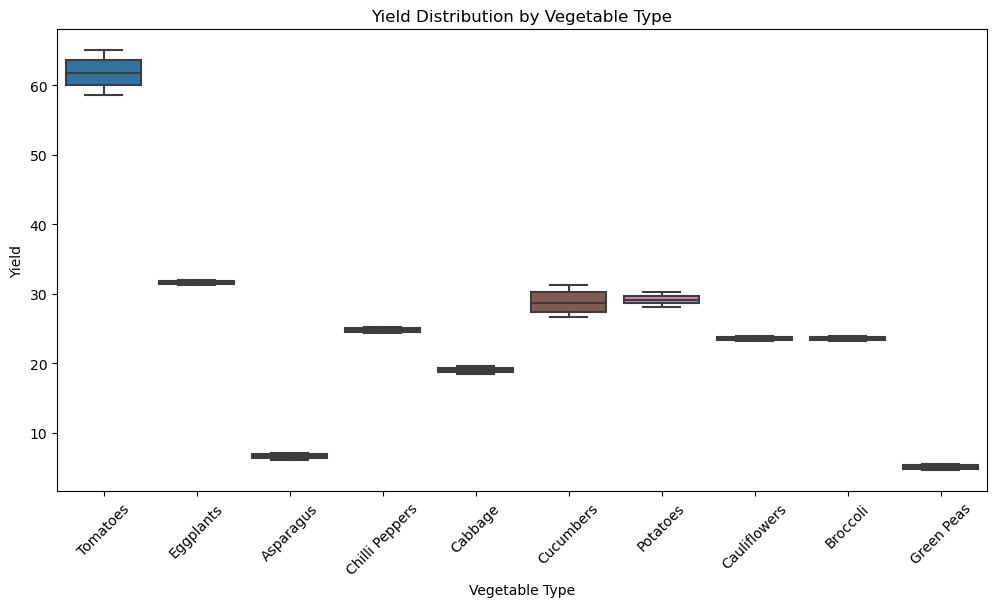

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Name', y='Yield', data=veg_data)
plt.xticks(rotation=45)
plt.xlabel('Vegetable Type')
plt.ylabel('Yield')
plt.title('Yield Distribution by Vegetable Type')
plt.show()

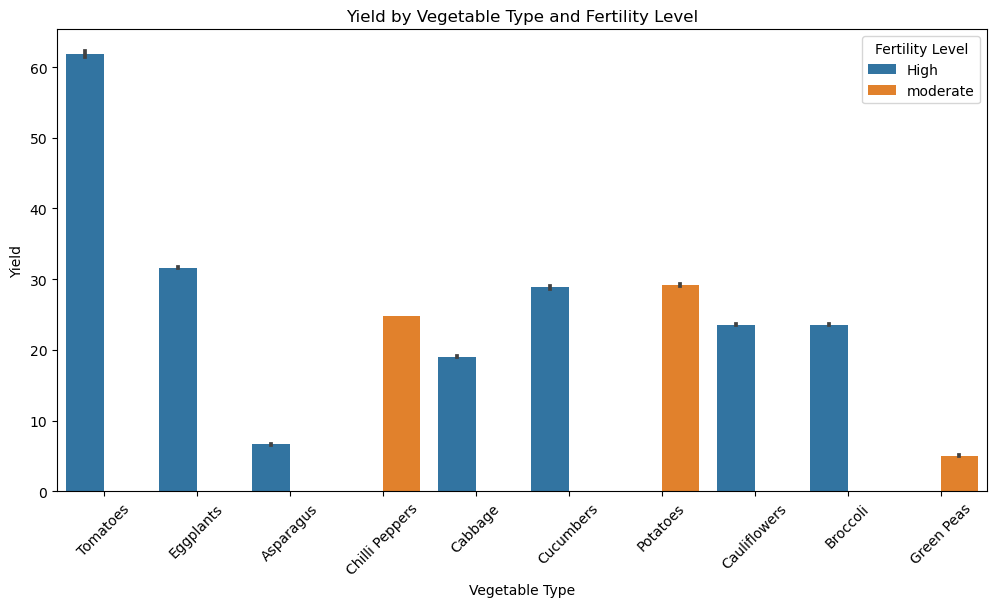

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='Yield', hue='Fertility', data=veg_data)
plt.xticks(rotation=45)
plt.xlabel('Vegetable Type')
plt.ylabel('Yield')
plt.title('Yield by Vegetable Type and Fertility Level')
plt.legend(title='Fertility Level')
plt.show()

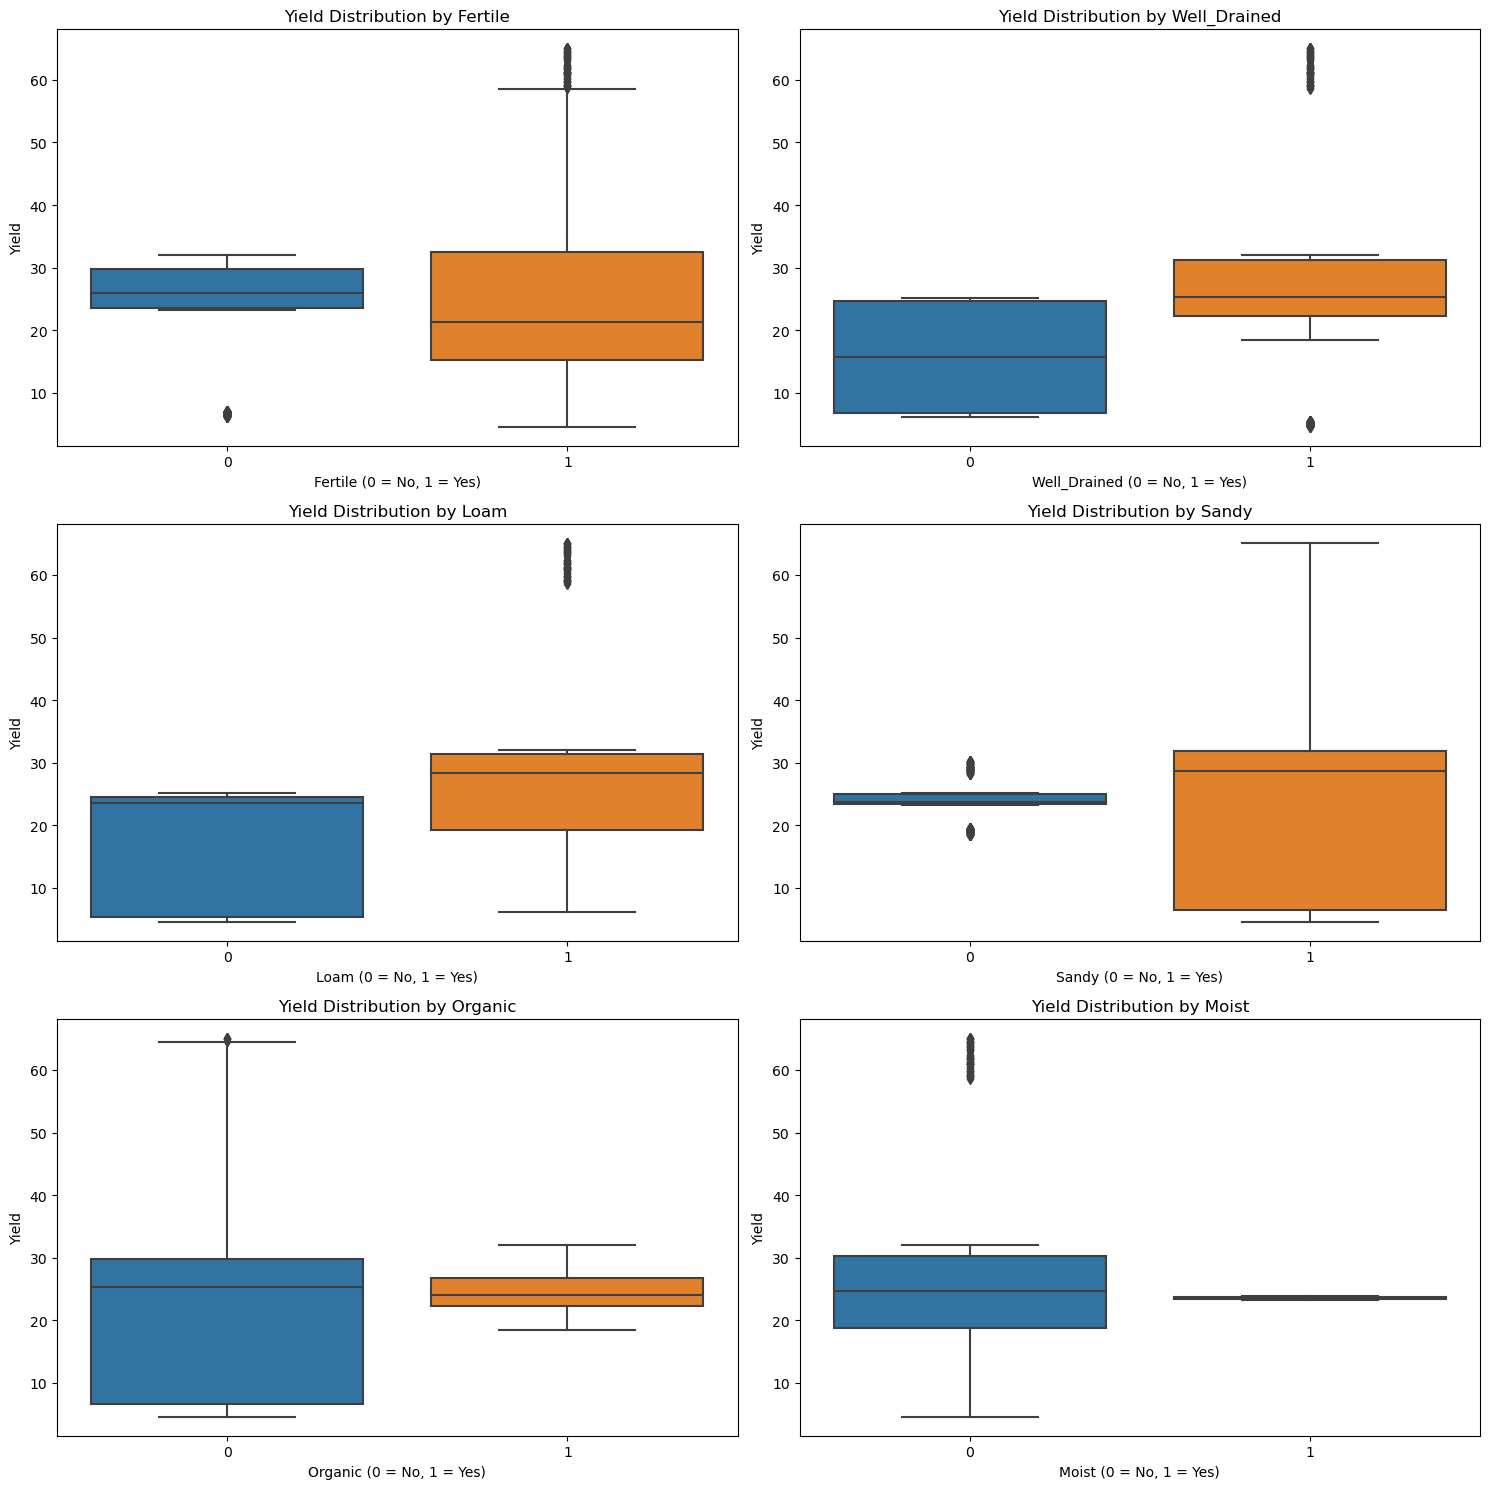

In [56]:
soil_characteristics = ['Fertile', 'Well_Drained', 'Loam', 'Sandy', 'Organic', 'Moist']

#3x3 grid of box plots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

#flatten the axes array for easy iteration
axes = axes.flatten()

#loop through each soil characteristic and create a box plot
for i, characteristic in enumerate(soil_characteristics):
    sns.boxplot(x=characteristic, y='Yield', data=veg_data, ax=axes[i])
    axes[i].set_title(f'Yield Distribution by {characteristic}')
    axes[i].set_xlabel(f'{characteristic} (0 = No, 1 = Yes)')
    axes[i].set_ylabel('Yield')


plt.tight_layout()
plt.show()

Well drained, sandy, and loamy appear to have a higher median of yeild. There are lots of other factors that may influence yield that are not taken into consideration. 

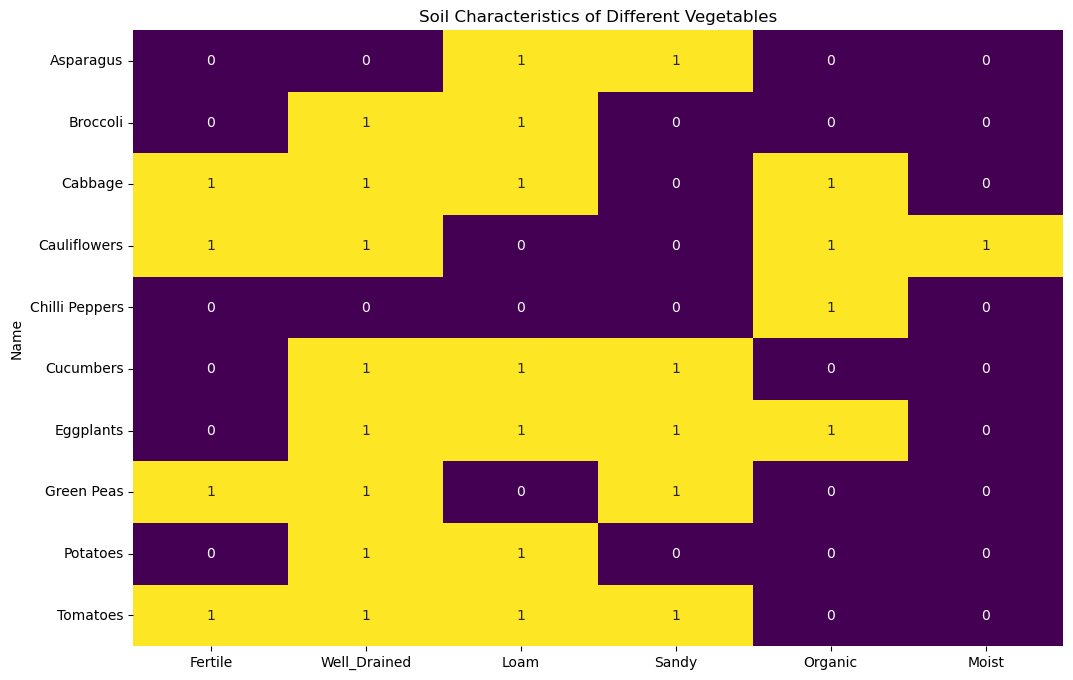

In [57]:
#subset of the DataFrame with vegetable names and soil characteristics
soil_characteristics = ['Fertile', 'Well_Drained', 'Loam', 'Sandy', 'Organic', 'Moist']
veg_soil_matrix = veg_data[['Name'] + soil_characteristics]

#Group by vegetable name and aggregate to ensure each vegetable appears only once
veg_soil_matrix = veg_soil_matrix.groupby('Name').max().reset_index()

#Set vegetable names as the index for better visualization
veg_soil_matrix.set_index('Name', inplace=True)

#plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(veg_soil_matrix, annot=True, cmap='viridis', cbar=False)
plt.title('Soil Characteristics of Different Vegetables')
plt.show()

### Continuous, Numeric Variables

- `Temperature` (float64): Average temperature (in degrees Celsius)
- `Rainfall` (float64): Amount of rainfall (in millimeters)
- `pH` (float64): pH level of the soil
- `Light_Hours` (float64): Number of light hours per day
- `Light_Intensity` (float64): Intensity of light received (in lumens)
- `Rh` (float64): Relative humidity (percentage)
- `Yield` (float64): Yield of the vegetable (in tons per hectare)
- `N-P-K Ratio` (object): Ratio of Nitrogen (N), Phosphorus (P), and Potassium (K) in the soil

In [17]:
#basic descriptive stats:
veg_data.describe()

,S. no.,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Yield
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.500000,21.469601,901.178170,6.334505,7.803823,446.973795,62.566657,25.422725
std,2.873719,4.127673,267.609546,0.482434,1.248393,140.958975,10.407530,14.880897
min,1.000000,10.032192,400.356795,5.008253,6.000732,201.295040,40.340188,4.593589
25%,3.000000,18.784208,692.605623,6.048547,6.794432,340.205983,54.392259,19.052663
50%,5.500000,21.312237,912.538905,6.351051,7.592936,422.708570,60.038860,24.105095
75%,8.000000,24.182824,1079.095532,6.648184,8.669339,532.610057,69.612802,29.845462
max,10.000000,31.822844,1597.213303,7.494046,11.958007,799.287905,89.945240,65.047550


**N-P-K** 

In [59]:
# Split the 'N-P-K Ratio' into three separate columns
npk_split = veg_data['N-P-K Ratio'].str.split(':', expand=True)
veg_data['N'] = pd.to_numeric(npk_split[0])
veg_data['P'] = pd.to_numeric(npk_split[1])
veg_data['K'] = pd.to_numeric(npk_split[2])

#Group by 'Name' and check unique NPK ratios for each vegetable
npk_variation = veg_data.groupby('Name').apply(lambda x: x[['N', 'P', 'K']].drop_duplicates()).reset_index(drop=True)

# Display the variations
print(npk_variation)

    N   P   K
0  10  10  10
1  10  10  10
2  10  10  10
3  10  10  10
4  10  10  10
5  10  10  10
6   5  10  10
7   5  10  10
8  10  10  10
9  10  10  10


In [62]:
#Does each vegetable have a set NPK ratio across dataset
unique_npk_ratios = veg_data.groupby('Name')[['N', 'P', 'K']].apply(lambda x: x.drop_duplicates()).reset_index()
unique_npk_ratios.drop('level_1', axis=1, inplace=True)
print("Unique NPK ratios for each vegetable:")
print(unique_npk_ratios)

Unique NPK ratios for each vegetable:
             Name   N   P   K
0       Asparagus  10  10  10
1        Broccoli  10  10  10
2         Cabbage  10  10  10
3    Cauliflowers  10  10  10
4  Chilli Peppers  10  10  10
5       Cucumbers  10  10  10
6       Eggplants   5  10  10
7      Green Peas   5  10  10
8        Potatoes  10  10  10
9        Tomatoes  10  10  10


- Is NPK reffering to fertilizer ratios for each vegetable? 

- There is one NPK ratio for each vegetable and this is the same for each sample. For most vegetables N percentage is 10 (if the NPK ratio is indeed a percentage here?), excluding eggplants and Green peas which have a nitrogen of 5%. All other vegetables have a P and K percentage of 10. 
 

In [68]:
#assign numeric variables to list 
continuous_vars = ['Temperature', 'Rainfall', 'pH', 'Light_Hours', 'Light_Intensity', 'Rh', 'Yield']

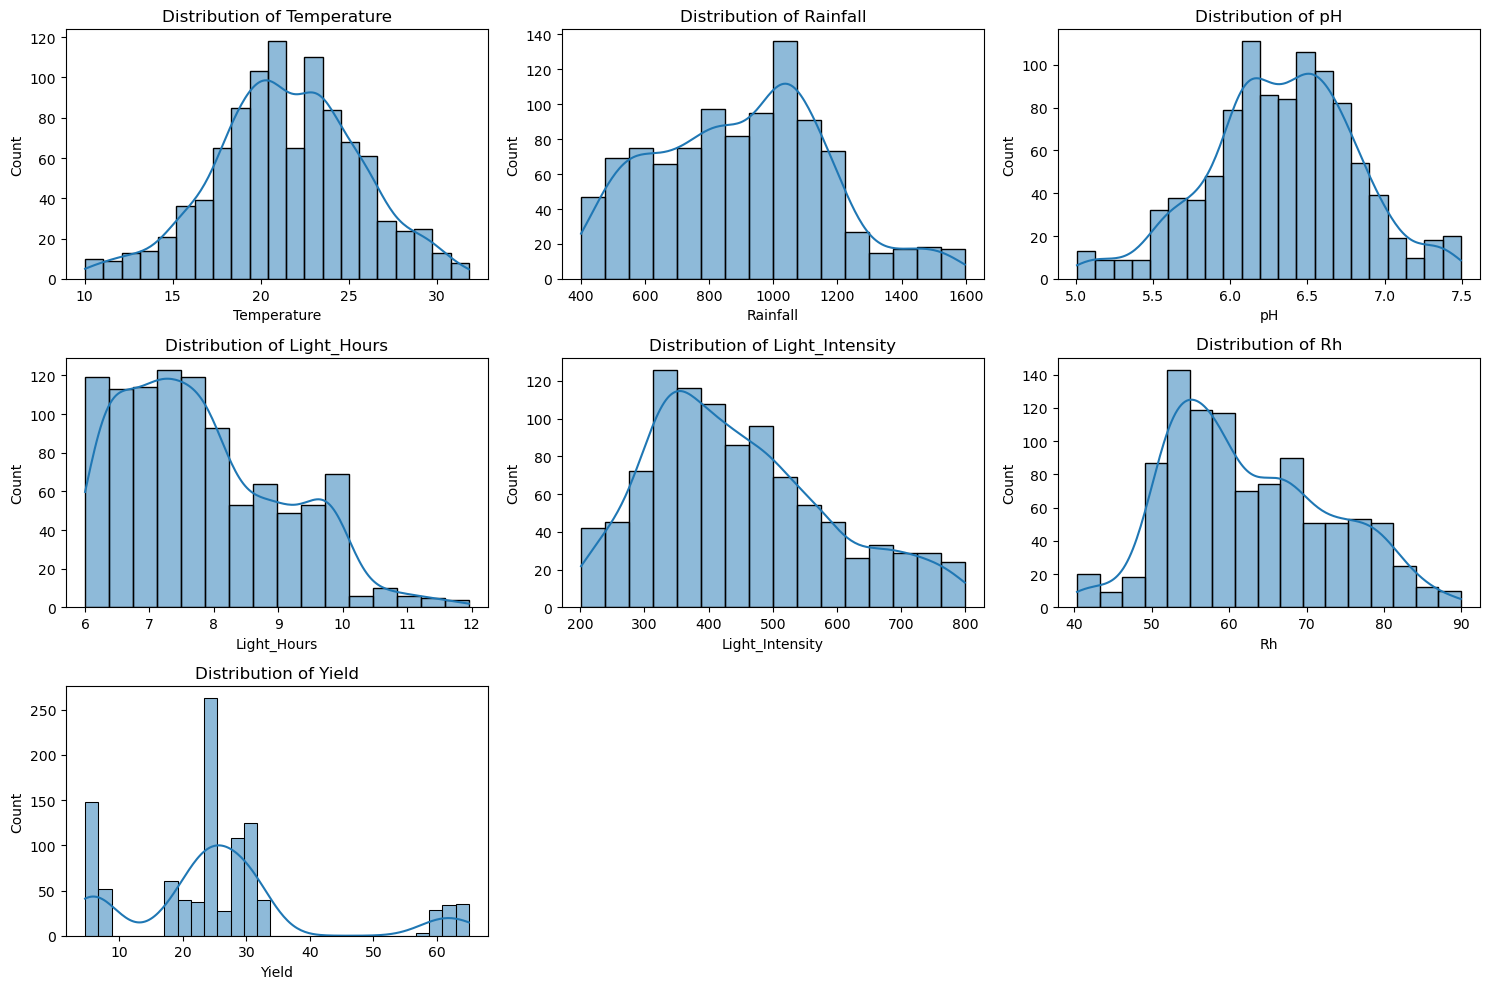

In [69]:
#histograms for each continuous variable
plt.figure(figsize=(15, 10))

for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(veg_data[var], kde=True)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

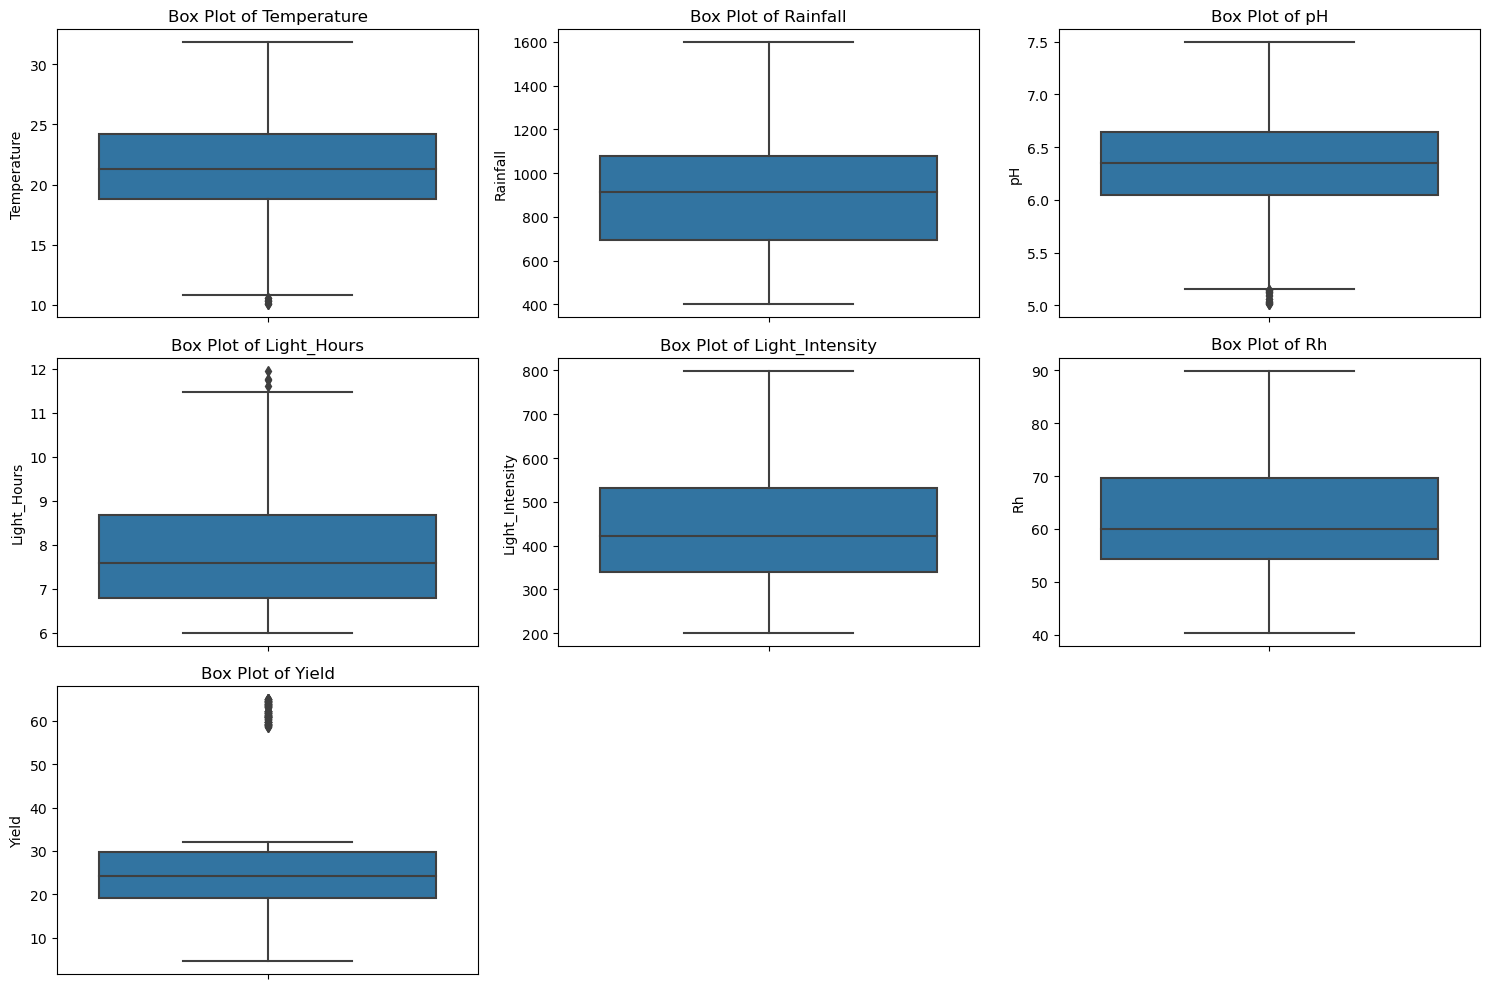

In [70]:
# Box plots for each continuous variable
plt.figure(figsize=(15, 10))

for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=veg_data[var])
    plt.title(f'Box Plot of {var}')

plt.tight_layout()
plt.show()

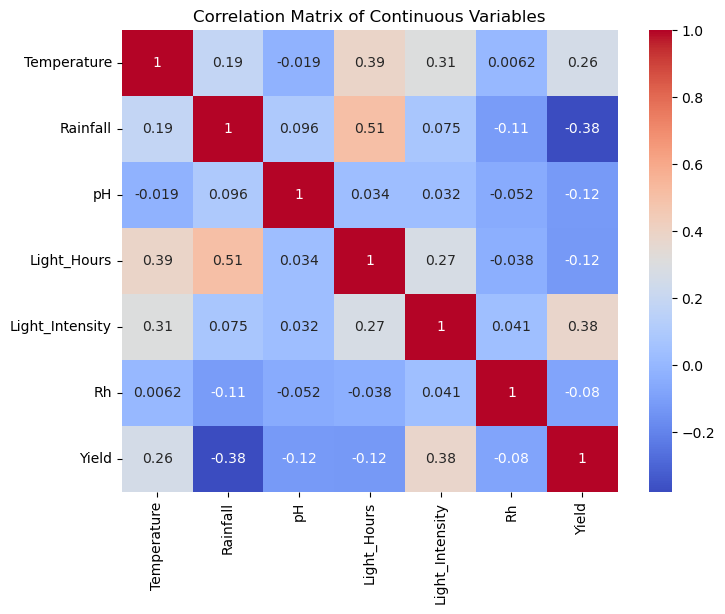

In [76]:
# Calculate the correlation matrix
corr_matrix = veg_data[continuous_vars].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

In [77]:
#Include binarized soil features  in correlation matrix: 
add_features = ['Temperature', 'Rainfall', 'pH', 'Light_Hours', 'Light_Intensity', 'Rh', 'Yield', 'Fertile',
                 'Well_Drained', 'Loam', 'Sandy', 'Organic', 'Moist']

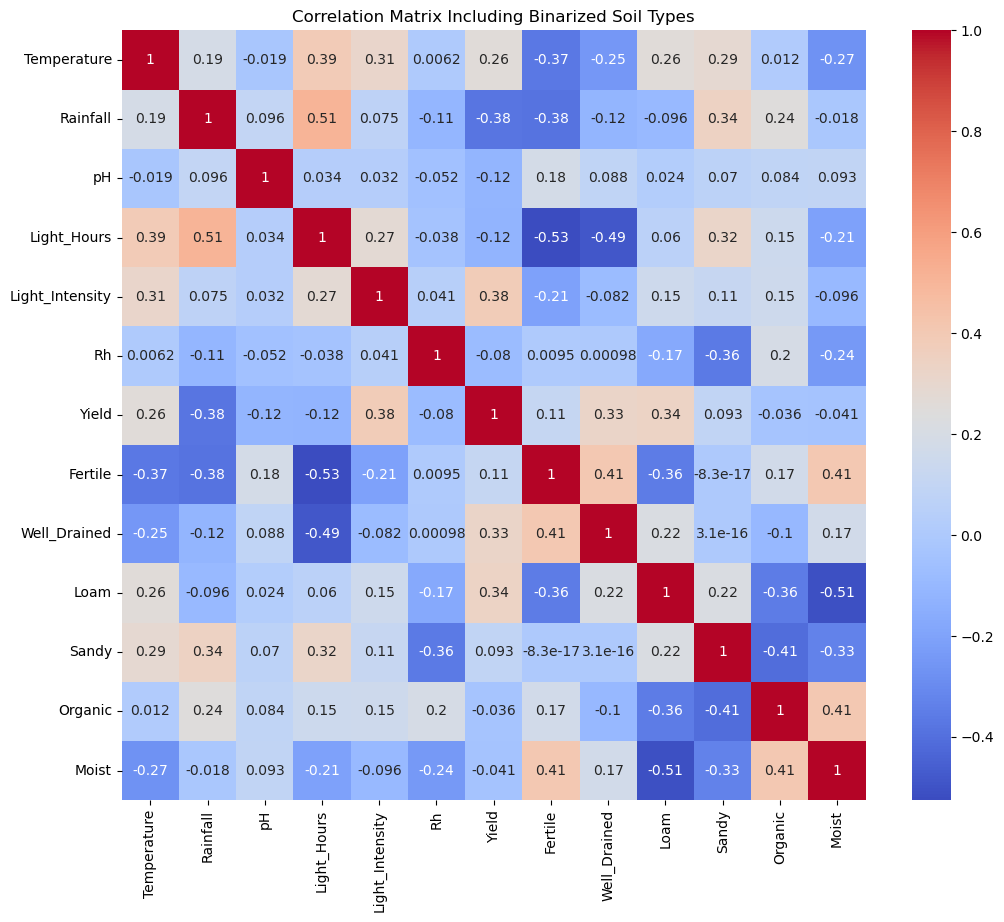

In [78]:
correlation_matrix = veg_data[add_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Including Binarized Soil Types')
plt.show()

In [81]:
#Look at variance in features
feature_variance = veg_data[add_features].var()
print("Feature Variance:")
print(feature_variance)

Feature Variance:
Temperature           17.037682
Rainfall           71614.869262
pH                     0.232743
Light_Hours            1.558485
Light_Intensity    19869.432535
Rh                   108.316671
Yield                221.441082
Fertile                0.240240
Well_Drained           0.160160
Loam                   0.210210
Sandy                  0.250250
Organic                0.240240
Moist                  0.090090
dtype: float64


In [119]:
#VIF Variance Inflation Factor to Assess multicolinearity
X = veg_data[add_features]

#constant column for the intercept term
X_with_const = sm.add_constant(X)

#calculate VIF for each feature (excluding the constant term)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns  # Use original feature names
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i + 1) for i in range(X.shape[1])]  # Skip the constant

print(vif_data)

            feature       VIF
0       Temperature  1.599031
1          Rainfall  2.442450
2                pH  1.639791
3       Light_Hours  2.240728
4   Light_Intensity  1.421406
5                Rh  2.078334
6             Yield  2.374530
7           Fertile  5.736540
8      Well_Drained  2.320711
9              Loam  6.097820
10            Sandy  2.778852
11          Organic  2.485781
12            Moist  4.433556


- VIF = 1: No multicollinearity.
- 1 < VIF < 5: Moderate multicollinearity.
- VIF > 5: High multicollinearity, which may be problematic.
- VIF > 10: Indicates serious multicollinearity problems

Appears to be moderate multicollinearity in data set.  Especially in binarized soil features, which is expected. 

# Lasso Regression to Assess Factors Influencing Yield

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoCV

**Encode Categorical Variables that have not been encoded**

In [87]:
# One-hot encode the vegetable names
veg_data = pd.get_dummies(veg_data, columns=['Name'], drop_first=False) #Can drop a column later to create baseline

In [88]:
#binarize fertility column 
veg_data['Fertile'] = veg_data['Fertility'].apply(lambda x: 1 if x == 'High' else 0)


In [90]:
veg_data.head(3)

,S. no.,Soil_Type,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,...,Name_Asparagus,Name_Broccoli,Name_Cabbage,Name_Cauliflowers,Name_Chilli Peppers,Name_Cucumbers,Name_Eggplants,Name_Green Peas,Name_Potatoes,Name_Tomatoes
0,1,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,26.483577,555.640013,6.723995,6.161744,459.558388,...,False,False,False,False,False,False,False,False,False,True
1,1,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,24.658866,548.369437,6.630615,7.341362,403.734739,...,False,False,False,False,False,False,False,False,False,True
2,1,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,23.036639,548.656752,6.228059,6.155745,567.426957,...,False,False,False,False,False,False,False,False,False,True


### Lasso Regression of Entire data set , looking at Yeild

In [ ]:
veg_overall_yield = veg_data['Temperature', 'Rainfall', 'pH', 'Light_Hours', 'Light_Intensity', 'Rh', 
    'N', 'P', 'K','Fertile', 'Well_Drained', 'Loam', 'Sandy', 'Organic', 'Moist',
    'Name_Asparagus', 'Name_Broccoli', 'Name_Cabbage', 'Name_Cauliflowers', 
    'Name_Chilli Peppers', 'Name_Cucumbers', 'Name_Eggplants', 
    'Name_Green Peas', 'Name_Potatoes']

In [100]:
#Seperate continuos and categorical -> assign to variable, standardize continious variables
continuous_columns = [
    'Temperature', 'Rainfall', 'pH', 'Light_Hours', 'Light_Intensity', 'Rh', 
    'N', 'P', 'K'
]

categorical_columns = [
    'Fertile', 'Well_Drained', 'Loam', 'Sandy', 'Organic', 'Moist',
    'Name_Asparagus', 'Name_Broccoli', 'Name_Cabbage', 'Name_Cauliflowers', 
    'Name_Chilli Peppers', 'Name_Cucumbers', 'Name_Eggplants', 
    'Name_Green Peas', 'Name_Potatoes'
    # 'Name_Tomatoes' is dropped to avoid multicollinearity
]

In [102]:
#Standardiez continuous variables
scaler = StandardScaler()
veg_data_standardized = veg_data.copy()
veg_data_standardized[continuous_columns] = scaler.fit_transform(veg_data[continuous_columns])

In [103]:
#Create df for Lasso regression; veg_overall_yield
selected_columns = continuous_columns + categorical_columns
veg_overall_yield = veg_data_standardized[selected_columns]

In [104]:
veg_overall_yield.head(2)

,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,N,P,K,Fertile,...,Moist,Name_Asparagus,Name_Broccoli,Name_Cabbage,Name_Cauliflowers,Name_Chilli Peppers,Name_Cucumbers,Name_Eggplants,Name_Green Peas,Name_Potatoes
0,1.215330,-1.291849,0.807746,-1.316012,0.089323,-0.710616,0.5,0.0,0.0,1,...,0,False,False,False,False,False,False,False,False,False
1,0.773041,-1.319031,0.614089,-0.370630,-0.306903,-0.393314,0.5,0.0,0.0,1,...,0,False,False,False,False,False,False,False,False,False


In [106]:
veg_overall_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature          1000 non-null   float64
 1   Rainfall             1000 non-null   float64
 2   pH                   1000 non-null   float64
 3   Light_Hours          1000 non-null   float64
 4   Light_Intensity      1000 non-null   float64
 5   Rh                   1000 non-null   float64
 6   N                    1000 non-null   float64
 7   P                    1000 non-null   float64
 8   K                    1000 non-null   float64
 9   Fertile              1000 non-null   int64  
 10  Well_Drained         1000 non-null   int64  
 11  Loam                 1000 non-null   int64  
 12  Sandy                1000 non-null   int64  
 13  Organic              1000 non-null   int64  
 14  Moist                1000 non-null   int64  
 15  Name_Asparagus       1000 non-null   bo

In [107]:
#Define X and y 
X = veg_overall_yield
y = veg_data['Yield']

In [108]:
#Train, Test Split (oy-> overall yield)
X_train_oy, X_test_oy, y_train_oy, y_test_oy = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
#Lasso, instatiate model
Lasso_cv = LassoCV(cv=5, random_state =7)
#Fit model
Lasso_cv.fit(X_train_oy, y_train_oy)
#Get best alpha value: 
best_alpha= Lasso_cv.alpha_
print('alpha:', best_alpha)

alpha: 0.005487267806384636


In [118]:
y_train_pred_oy = Lasso_cv.predict(X_train_oy)
mse_train = mean_squared_error(y_train_oy, y_train_pred_oy)
r2_train = r2_score(y_train_oy, y_train_pred_oy)
print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R-squared: {r2_train}")

Training Mean Squared Error: 0.6727107465116907
Training R-squared: 0.9969217101821276


In [115]:
#Evaluate and look at features
y_pred_oy = Lasso_cv.predict(X_test_oy)

#Calculate performance metrics
mse= mean_squared_error(y_test_oy, y_pred_oy)
r2 = r2_score(y_test_oy, y_pred_oy)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

#Coeffs
print("Lasso Coefficients:")
for feature, coef in zip(X.columns, Lasso_cv.coef_):
    print(f"{feature}: {coef}")

Mean Squared Error: 0.7111951721205264
R-squared: 0.9969272598449899
Lasso Coefficients:
Temperature: 0.04869616634275525
Rainfall: -0.12673735678062706
pH: 0.00796971778191326
Light_Hours: 0.06375492637204476
Light_Intensity: 0.012166607966395857
Rh: -0.0
N: 11.929346378171992
P: 0.0
K: 0.0
Fertile: -0.0
Well_Drained: 0.0
Loam: 5.403991520523407
Sandy: 32.421083555521164
Organic: -0.0
Moist: -0.0
Name_Asparagus: -54.81544326164185
Name_Broccoli: -5.436237095657828
Name_Cabbage: -10.04657052129386
Name_Cauliflowers: -0.0
Name_Chilli Peppers: 0.9315324983477826
Name_Cucumbers: -32.697319546026506
Name_Eggplants: 0.0
Name_Green Peas: -21.083655320995327
Name_Potatoes: 0.0


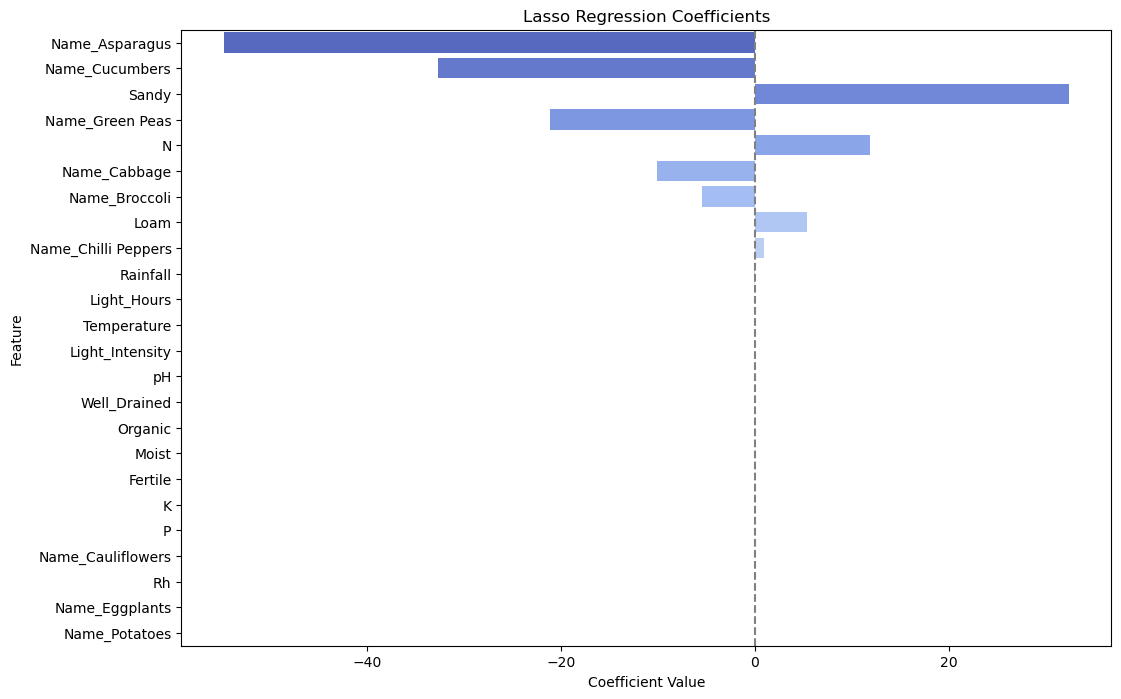

In [117]:
#plot 
feature_names = X.columns
coefficients = Lasso_cv.coef_
#df of coeffs
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
#sort coeffs (Use absolute value to sort)
coeff_df = coeff_df.reindex(coeff_df.Coefficient.abs().sort_values(ascending=False).index)

#PLOT 
plt.figure(figsize=(12, 8))

sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='coolwarm', orient='h')

#Add a vertical line at x=0 for the middle axis
plt.axvline(x=0, color='grey', linestyle='--')

#titles and labels
plt.title('Lasso Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()



## Model Performance Metrics

| Metric          | Value              |
|-----------------|--------------------|
| Mean Squared Error (MSE) | 0.7111951721205264 |
| R-squared (R²)           | 0.9969272598449899 |

## Coefficients Interpretation

### Predictors

| Feature             | Coefficient     | Interpretation                                                 |
|---------------------|-----------------|---------------------------------------------------------------|
| Temperature         | 0.048696        | Slight positive impact on yield                                |
| Rainfall            | -0.126737       | Slight negative impact on yield                                |
| pH                  | 0.007970        | Very slight positive impact on yield                           |
| Light_Hours         | 0.063755        | Slight positive impact on yield                                |
| Light_Intensity     | 0.012167        | Very slight positive impact on yield                           |
| Rh                  | -0.0            | No significant impact                                          |
| N                   | 11.929346       | Strong positive impact on yield                                |
| P                   | 0.0             | No significant impact                                          |
| K                   | 0.0             | No significant impact                                          |
| Fertile             | -0.0            | No significant impact                                          |
| Well_Drained        | 0.0             | No significant impact                                          |
| Loam                | 5.403992        | Positive impact on yield                                       |
| Sandy               | 32.421084       | Strong positive impact on yield                                |
| Organic             | -0.0            | No significant impact                                          |
| Moist               | -0.0            | No significant impact                                          |

### Vegetable Types

| Feature             | Coefficient     | Interpretation                                                 |
|---------------------|-----------------|---------------------------------------------------------------|
| Name_Asparagus      | -54.815443      | Strong negative impact on yield                                |
| Name_Broccoli       | -5.436237       | Negative impact on yield                                       |
| Name_Cabbage        | -10.046571      | Negative impact on yield                                       |
| Name_Cauliflowers   | -0.0            | No significant impact                                          |
| Name_Chilli Peppers | 0.931533        | Slight positive impact on yield                                |
| Name_Cucumbers      | -32.697320      | Strong negative impact on yield                                |
| Name_Eggplants      | 0.0             | No significant impact                                          |
| Name_Green Peas     | -21.083655      | Strong negative impact on yield                                |
| Name_Potatoes       | 0.0             | No significant impact                                          |

## Key Findings

- **High R² Value**: Indicates high fit of the model, explaining nearly all the variance in yield. 
- **Significant Predictors**: Nitrogen content (N), loam and sandy soil types, and specific vegetables (asparagus, cucumbers, green peas) have substantial impacts on yield. Asparagus, cucumbers and green peas have a small yeild compared to baseline (tomatoes)
- **Positive and Negative Impacts**: Temperature, light hours, and nitrogen content positively impact yield, while rainfall and certain vegetables (asparagus, cucumbers, green peas) negatively impact overall yield of vegetables in this data set.


### Lasso Regression for each Vegetable to find important features affecting Yeild 

In [133]:
#list of continuos variables
continuous_vars = ['Temperature', 'Rainfall', 'pH', 'Light_Hours', 'Light_Intensity', 'Rh', 'N', 'P', 'K']

#vegetable names (binarized features) list
vegetables = ['Name_Asparagus', 'Name_Broccoli', 'Name_Cabbage', 'Name_Cauliflowers', 
              'Name_Chilli Peppers', 'Name_Cucumbers', 'Name_Eggplants', 
              'Name_Green Peas', 'Name_Potatoes', 'Name_Tomatoes']

#soil features (multilabel binarized) list
soil_features = ['Fertile', 'Well_Drained', 'Loam', 'Sandy', 'Organic', 'Moist']

#standardize the continuous variables
scaler = StandardScaler()
veg_data_standardized = veg_data.copy()
veg_data_standardized[continuous_vars] = scaler.fit_transform(veg_data_standardized[continuous_vars])

#create final DataFrame with standardized continuous variables and binarized features
veg_yield = veg_data_standardized[continuous_vars + soil_features + vegetables ]


In [134]:
veg_yield['Yield'] = veg_data.loc[veg_yield.index, 'Yield']

/var/folders/h5/pnqm5hvd2vj1397_ck_gmtj00000gn/T/ipykernel_23529/1808702348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veg_yield['Yield'] = veg_data.loc[veg_yield.index, 'Yield']


In [135]:
veg_yield['Yield']

0      59.082461
1      61.836617
2      62.014527
3      60.940745
4      64.556501
         ...    
995     5.516240
996     4.861078
997     4.612795
998     4.903058
999     4.693789
Name: Yield, Length: 1000, dtype: float64

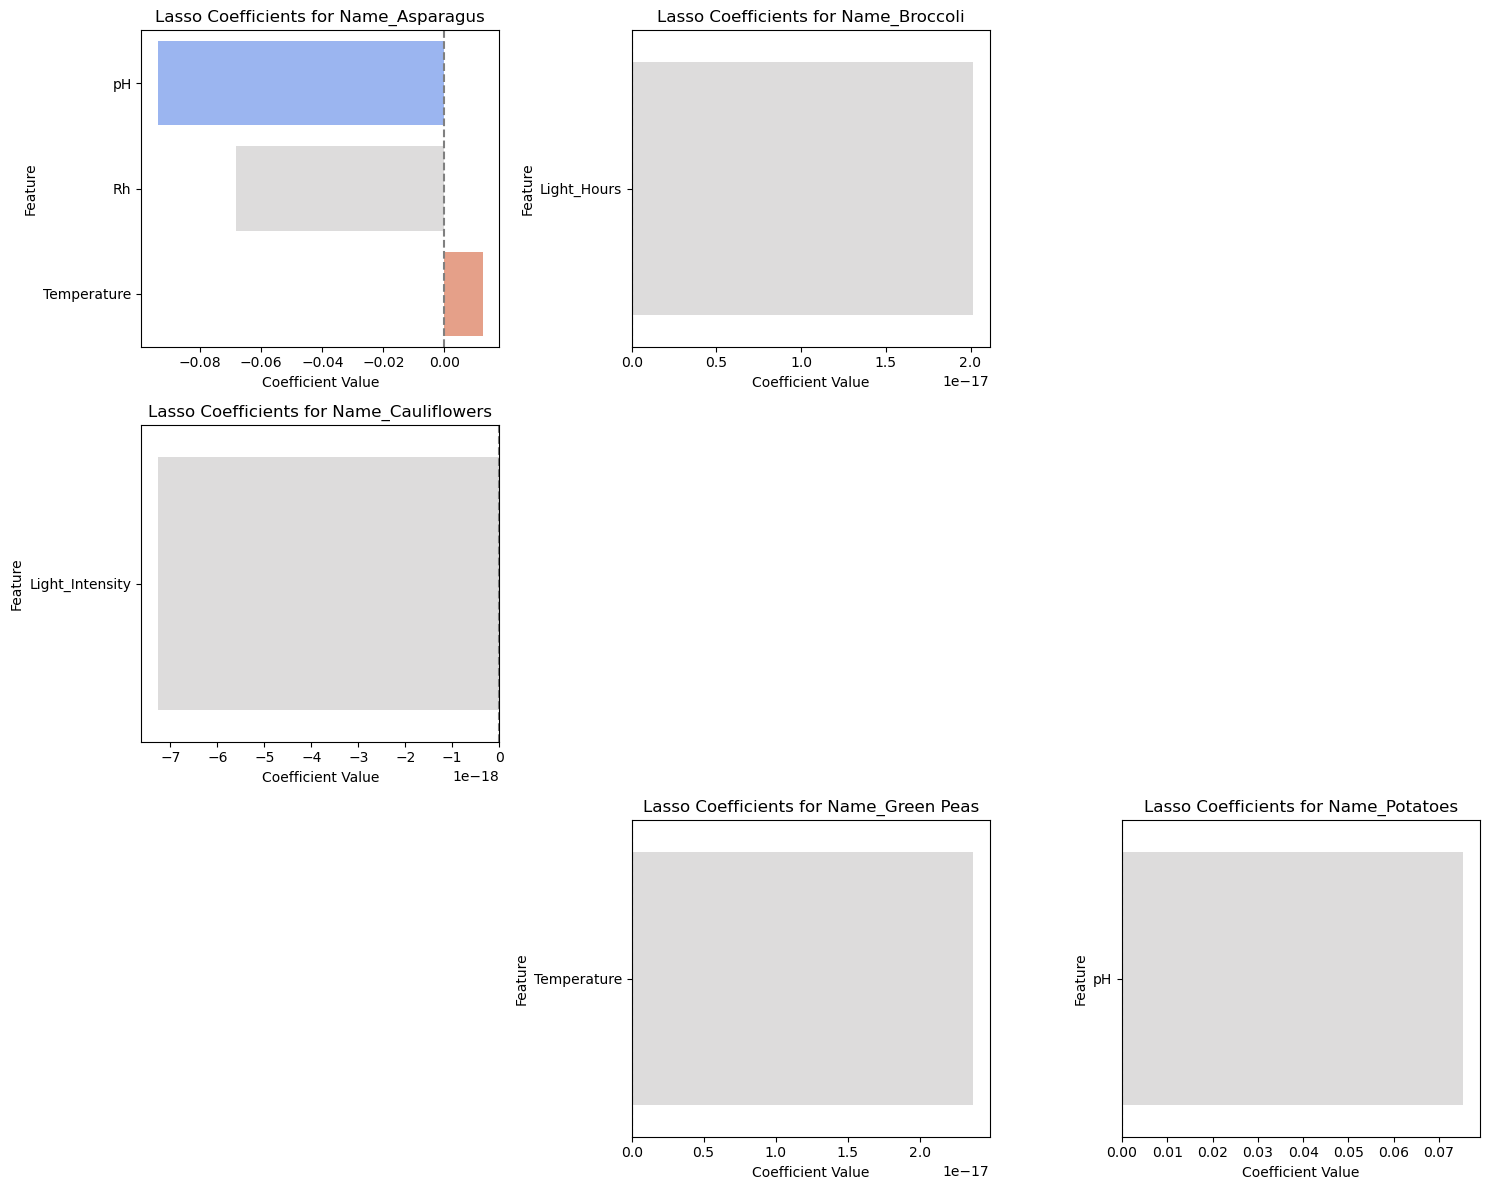

Results for Name_Asparagus:
Best alpha: 0.013196640909465988
Coefficients:
  Temperature: 0.012577695842808838
  Rainfall: -0.0
  pH: -0.09396048342130443
  Light_Hours: 0.0
  Light_Intensity: -0.0
  Rh: -0.06821262210283092
  N: 0.0
  P: 0.0
  K: 0.0
  Fertile: 0.0
  Well_Drained: 0.0
  Loam: 0.0
  Sandy: 0.0
  Organic: 0.0
  Moist: 0.0
Training MSE: 0.09017249280815993
Training R-squared: 0.07317514889034227
Testing MSE: 0.06722550650993772
Testing R-squared: -0.06382508114859209


Results for Name_Broccoli:
Best alpha: 0.007693088412419595
Coefficients:
  Temperature: -0.0
  Rainfall: -0.0
  pH: 0.0
  Light_Hours: 2.0119883614859243e-17
  Light_Intensity: -0.0
  Rh: -0.0
  N: 0.0
  P: 0.0
  K: 0.0
  Fertile: 0.0
  Well_Drained: 0.0
  Loam: 0.0
  Sandy: 0.0
  Organic: 0.0
  Moist: 0.0
Training MSE: 0.03767063300660491
Training R-squared: 0.0
Testing MSE: 0.04970513800000428
Testing R-squared: -0.014155986493611605


Results for Name_Cabbage:
Best alpha: 0.0343715310910393
Coefficient

In [136]:
results = {}

for veg in vegetables:
    #filter data for the current vegetable
    veg_data_subset = veg_yield[veg_yield[veg] == 1]
    
    #define features and target variable
    X = veg_data_subset.drop(columns=vegetables + ['Yield'])
    y = veg_data_subset['Yield']
    
    #split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #Lasso regression with cross-validation
    lasso_cv = LassoCV(cv=5, random_state=42)
    lasso_cv.fit(X_train, y_train)
    
    #get the best alpha value and coefficients
    best_alpha = lasso_cv.alpha_
    coefficients = lasso_cv.coef_
    
    #store results for the current vegetable
    results[veg] = {
        'best_alpha': best_alpha,
        'coefficients': coefficients,
        'mse_train': mean_squared_error(y_train, lasso_cv.predict(X_train)),
        'r2_train': r2_score(y_train, lasso_cv.predict(X_train)),
        'mse_test': mean_squared_error(y_test, lasso_cv.predict(X_test)),
        'r2_test': r2_score(y_test, lasso_cv.predict(X_test)),
        'features': X.columns
    }

#Define the number of rows and columns for the grid
num_rows = 3  # Adjust based on your preference
num_cols = 3  # Adjust based on your preference

#Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

#Plot each vegetable's coefficients in a subplot
for ax, (veg, result) in zip(axes, results.items()):
    coeff_df = pd.DataFrame({
        'Feature': result['features'],
        'Coefficient': result['coefficients']
    })
    coeff_df = coeff_df[coeff_df['Coefficient'] != 0]
    if not coeff_df.empty: #if all coeffs are not zero
        coeff_df = coeff_df.reindex(coeff_df.Coefficient.abs().sort_values(ascending=False).index)
        sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='coolwarm', ax=ax)
        ax.axvline(x=0, color='grey', linestyle='--')
        ax.set_title(f'Lasso Coefficients for {veg}')
        ax.set_xlabel('Coefficient Value')
        ax.set_ylabel('Feature')
    else:
        ax.set_visible(False)
plt.tight_layout()
plt.show()

#results for each vegetable
for veg, result in results.items():
    print(f"Results for {veg}:")
    print(f"Best alpha: {result['best_alpha']}")
    print("Coefficients:")
    for feature, coef in zip(result['features'], result['coefficients']):
        print(f"  {feature}: {coef}")
    print(f"Training MSE: {result['mse_train']}")
    print(f"Training R-squared: {result['r2_train']}")
    print(f"Testing MSE: {result['mse_test']}")
    print(f"Testing R-squared: {result['r2_test']}")
    print("\n")

## Lasso Regression Results for Each Vegetable

| Vegetable          | Best Alpha | Non-zero Coefficients                                    | Training MSE | Training R² | Testing MSE  | Testing R²       |
|--------------------|------------|----------------------------------------------------------|--------------|-------------|--------------|------------------|
| Name_Asparagus     | 0.0132     | Temperature (0.013), pH (-0.094), Rh (-0.068)            | 0.0902       | 0.0732      | 0.0672       | -0.0638          |
| Name_Broccoli      | 0.0077     | Light_Hours (2.012e-17, essentially zero)                | 0.0377       | 0.0         | 0.0497       | -0.0142          |
| Name_Cabbage       | 0.0344     | None                                                     | 0.1131       | 0.0         | 0.0834       | -0.0596          |
| Name_Cauliflowers  | 0.0258     | None                                                     | 0.0406       | 0.0         | 0.0308       | -0.0008          |
| Name_Chilli Peppers| 0.0464     | None                                                     | 0.0715       | 0.0         | 0.0872       | -0.0471          |
| Name_Cucumbers     | 0.1943     | None                                                     | 1.9905       | 0.0         | 2.3961       | -7.4128e-06      |
| Name_Eggplants     | 0.0234     | None                                                     | 0.0565       | 0.0         | 0.0390       | -0.1094          |
| Name_Green Peas    | 0.0583     | Temperature (2.368e-17, essentially zero)                | 0.0880       | 0.0         | 0.0889       | -0.0038          |
| Name_Potatoes      | 0.0434     | pH (0.075)                                               | 0.3544       | 0.0270      | 0.3654       | -0.0278          |
| Name_Tomatoes      | 0.1254     | None                                                     | 3.6479       | 0.0         | 4.4639       | -0.0012          |


# SUMMARY SO FAR

- Appears that most vegetables do not show strong predictors for yield ( at least linear relationships and using lasso regression). 
- Could explore non linear methods for modelling with these same features? Or collect data on other possible predictors for yield? 
- Maybe explore Ridge Regression to help identify if predictors have weak linear relationship
- Feature Engineering? 